# DATA SCIENCE SALARIES 2024

In [1]:
# Import library python yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Mengambil dan membaca file csv
df = pd.read_csv('DataScience_salaries_2024.csv')

In [3]:
# Menampilkan 10 baris teratas dari dataset
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
6,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
8,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
9,2022,EN,FT,Research Engineer,5500000,JPY,41809,JP,50,JP,L


In [4]:
# Menampilkan jumlah data dan jumlah kolom
df.shape

(14838, 11)

In [5]:
# Menampilkan kolom-kolom yang ada dalam dataset
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
# Mendeskripsikan kolom yang memiliki tipe data numerik
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [7]:
# Mendeskripsikan kolom yang memiliki tipe data kategorikal
df.describe(include=['object'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,14838,14838,14838,14838,14838,14838,14838
unique,4,4,153,23,88,77,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,9696,14772,3162,13682,12926,12975,13674


In [8]:
# Menghitung frekuensi untuk setiap kolom kategorikal
kolom_kategorikal = ['experience_level', 'employment_type', 'job_title','salary_currency', 'employee_residence', 'company_location', 'company_size']

for column in kolom_kategorikal:
    print(f"Analisis kolom {column}")
    value_counts = df[column].value_counts()

    print(value_counts)
    print("\n")

Analisis kolom experience_level
experience_level
SE    9696
MI    3553
EN    1148
EX     441
Name: count, dtype: int64


Analisis kolom employment_type
employment_type
FT    14772
PT       27
CT       26
FL       13
Name: count, dtype: int64


Analisis kolom job_title
job_title
Data Engineer                      3162
Data Scientist                     3015
Data Analyst                       2189
Machine Learning Engineer          1542
Research Scientist                  475
                                   ... 
Deep Learning Researcher              1
Big Data Developer                    1
AWS Data Architect                    1
Staff Machine Learning Engineer       1
CRM Data Analyst                      1
Name: count, Length: 153, dtype: int64


Analisis kolom salary_currency
salary_currency
USD    13682
GBP      567
EUR      424
INR       53
CAD       51
AUD       12
CHF        8
PLN        7
SGD        6
BRL        4
JPY        4
HUF        3
TRY        3
DKK        3
THB        

In [9]:
# Mengecek tipe data setiap kolom
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [10]:
# Mengecek apakah ada nilai yang hilang pada setiap kolom
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
# Mengecek data yang duplikat
print(df.duplicated().sum())

5711


Karena ada data yang duplikat sebanyak 5711 records maka akan di drop

In [12]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [13]:
# Mengecek kembali data yang duplikat
df.duplicated().sum()

0

In [14]:
# Mengubah data kategorikal menjadi numerik

# Membuat salinan dataframe 
encoded_df = df.copy()

le = LabelEncoder()
columns_to_encode = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

for col in columns_to_encode:
    encoded_df[col] = le.fit_transform(encoded_df[col])

Untuk mencegah perubahan pada dataframe asli, maka dibuat salinan dari dataframe tersebut. Salinan ini digunakan khusus untuk mengubah data kategorikal menjadi numerik, dengan tujuan agar dapat digunakan untuk visualisasi korelasi dan distribusi data tanpa mempengaruhi data asli.

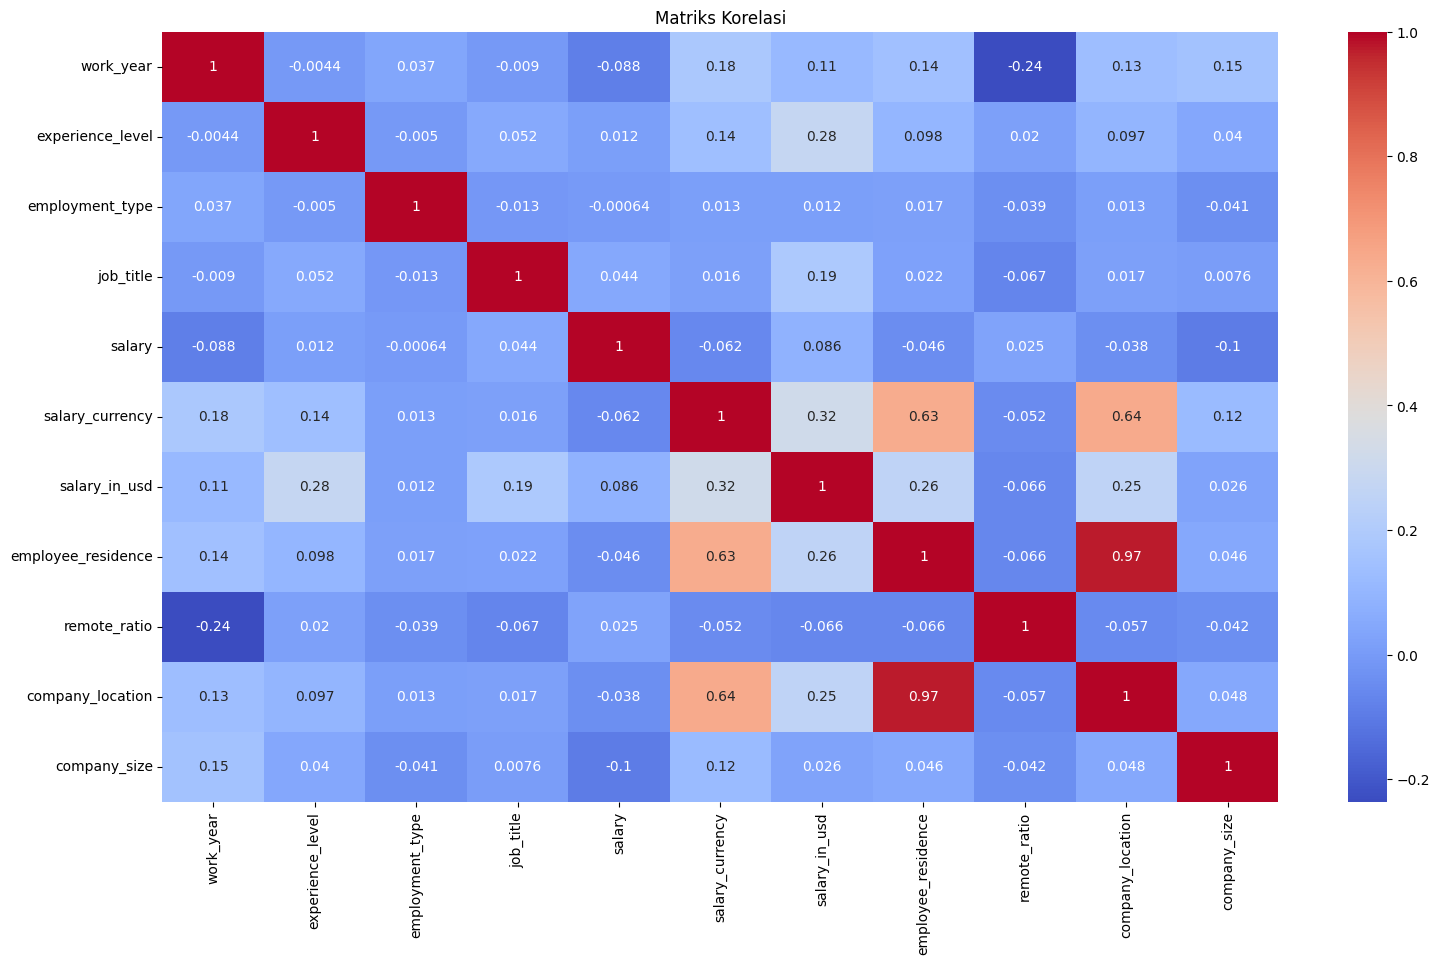

In [15]:
# Melihat korelasi antar kolom
kolom_numerik = encoded_df.select_dtypes(include=['number']).columns
korelasi = encoded_df[kolom_numerik].corr()

plt.figure(figsize=(18, 10))
sns.heatmap(korelasi, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


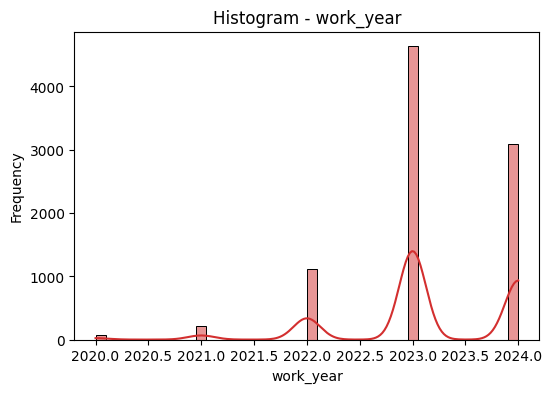

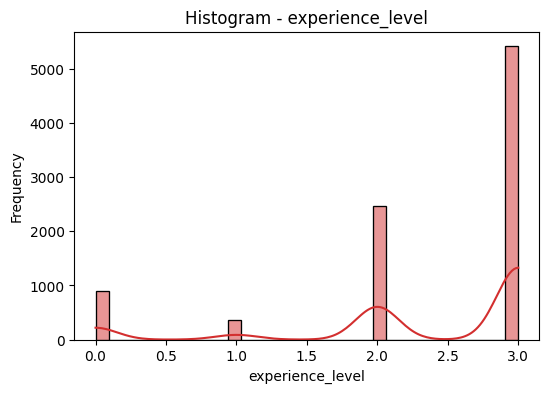

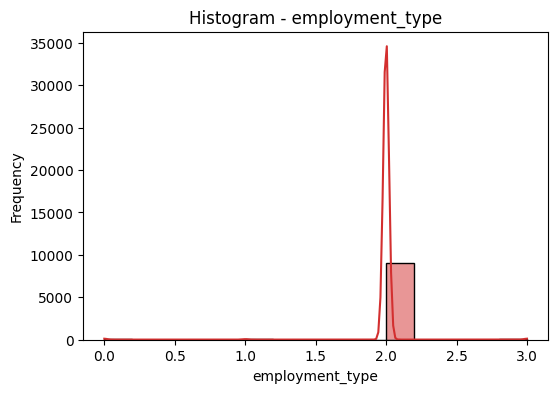

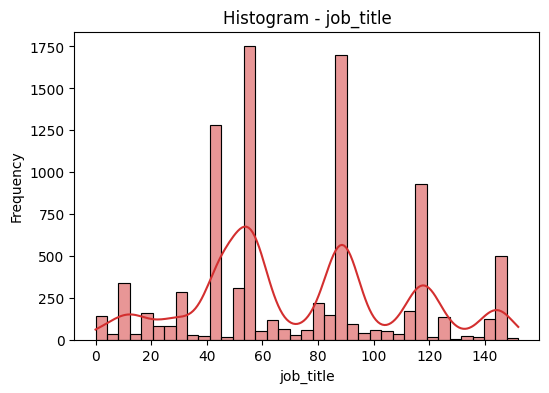

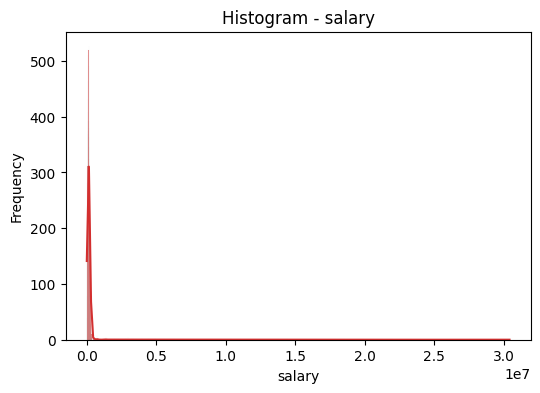

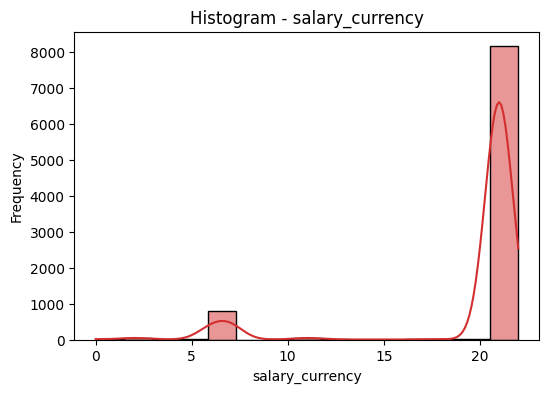

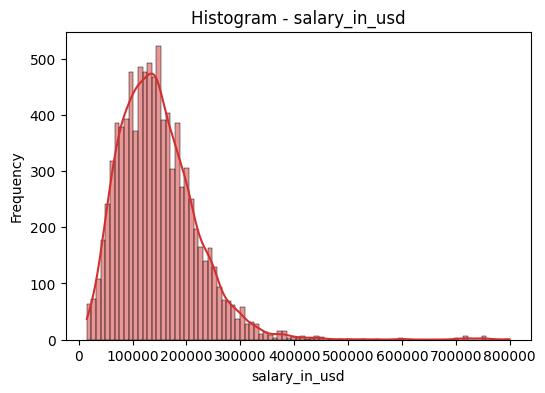

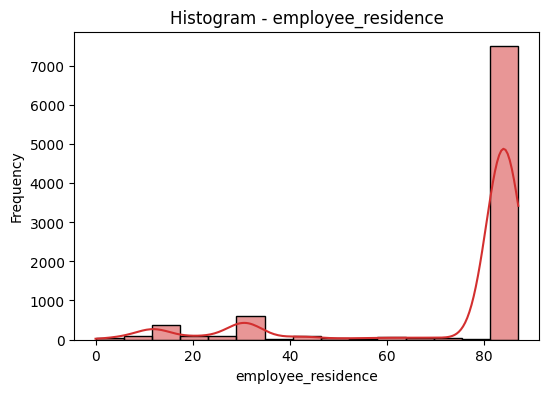

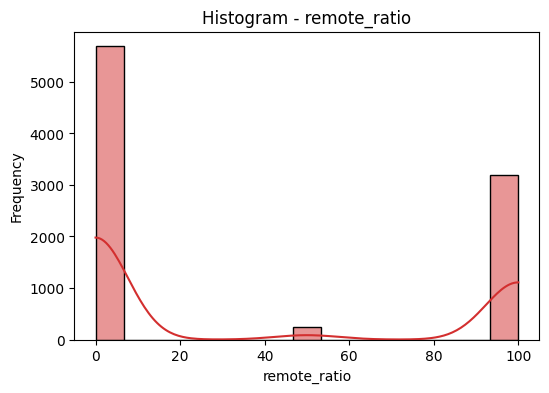

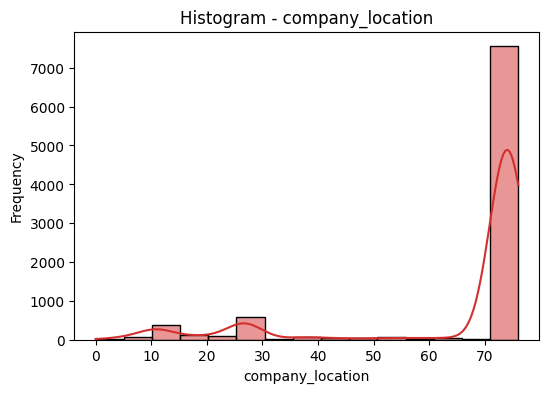

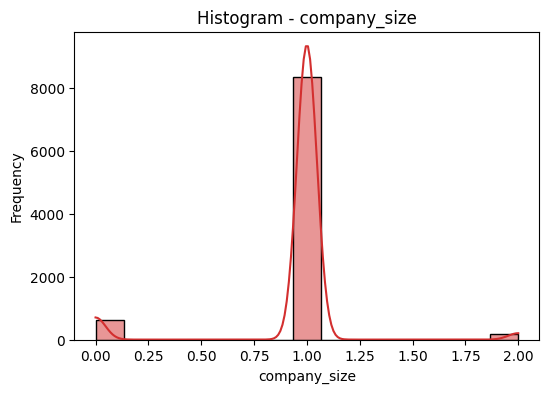

In [16]:
# Melihat distribui data
kolom_numerik = encoded_df.select_dtypes(include=['number']).columns
for i, kolom in enumerate(kolom_numerik):
    plt.figure(figsize=(6, 4))
    sns.histplot(encoded_df[kolom], kde=True, color='#D32F2F')
    plt.title(f'Histogram - {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Frequency')
    plt.show()

In [17]:
# Membuat kolom job category berdasarkan kolom job tittle
def map_job_title(df, original_column='job_title', new_column='job_category'):

    job_title_mapping = {
        'data analyst': 'Data Analyst',
        'bi analyst': 'Data Analyst',
        'analytics': 'Data Analyst',
        'data scientist': 'Data Scientist',
        'data science': 'Data Scientist',
        'decision scientist': 'Data Scientist',
        'data engineer': 'Data Engineer',
        'etl': 'Data Engineer',
        'pipeline': 'Data Engineer',
        'machine learning': 'ML Engineer',
        'ml': 'ML Engineer',
        'deep learning': 'ML Engineer',
        'ai': 'ML Engineer',
        'data architect': 'Data Engineer',
        'big data': 'Data Engineer',
        'cloud data': 'Data Engineer',
        'data manager': 'Data Engineer',
        'head of data': 'Data Engineer',
        'director': 'Data Engineer',
        'bi developer': 'Data Analyst',
        'power bi': 'Data Analyst',
        'business intelligence': 'Data Analyst',
        'research scientist': 'Data Scientist',
        'research engineer': 'Data Scientist',
        'statistician': 'Data Analyst',
        'quantitative': 'Data Analyst',
        'computational biologist': 'Data Scientist',
        'robotics': 'Data Engineer',
        'nlp': 'Data Engineer',
        'applied scientist': 'Data Scientist',
        'research analyst': 'Data Analyst',
        'data specialist ': 'Data Scientist',
        'data modeler': 'Data Engineer',
    }

    df[new_column] = df[original_column].str.lower().apply(
        lambda title: next((v for k, v in job_title_mapping.items() if k in title), 'Data Scientist')
    )
    return df

df = map_job_title(df)

In [18]:
# Mengganti nama singkatan pada kolom employment_type
employment_mapping = {
    'FT': 'Full-Time',
    'FL': 'Freelance',
    'CT': 'Contract',
    'PT': 'Part-Time'
}

df['employment_type'] = df['employment_type'].map(employment_mapping).fillna(df['employment_type'])


In [19]:
# Mengganti nama singkatan pada kolom experience_level
experience_mapping = {
    'EN': 'Junior',
    'MI': 'Mid-Level',
    'SE': 'Senior',
    'EX': 'Expert'
}

df['experience_level'] = df['experience_level'].map(experience_mapping).fillna(df['experience_level'])


# Visualization

## Salaries by Job Category

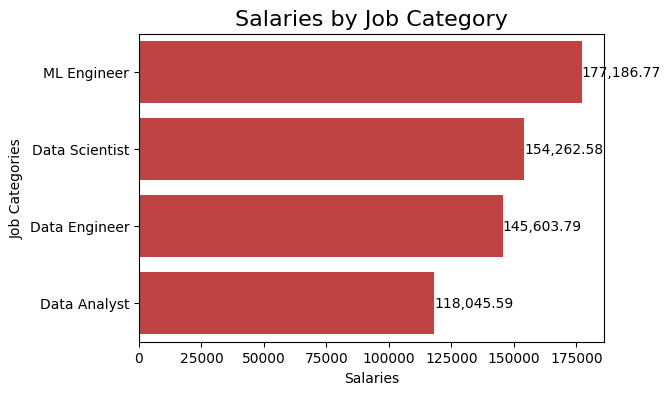

In [20]:
# Melihat gaji berdasarkan kategori pekerjaan
rata_gaji = df.groupby('job_category')['salary_in_usd'].mean().reset_index()

jobs = rata_gaji.sort_values(by='salary_in_usd', ascending=False)
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x='salary_in_usd', y='job_category', data=jobs, color='#D32F2F')
plt.title('Salaries by Job Category', fontsize=16)
plt.xlabel('Salaries', fontsize=10)
plt.ylabel('Job Categories', fontsize=10)

for index, value in enumerate(jobs['salary_in_usd']):
    bar_plot.text(value, index, f'{value:,.2f}', va='center')

plt.show()

Berdasarkan visualisasi di atas, dapat dilihat bahwa kategori pekerjaan ML Engineer (Machine Learning Engineer) memiliki rata-rata gaji tertinggi, yaitu sebesar 177,186.77 USD.

## Top 10 Jobs

C:\Users\User\AppData\Local\Temp\ipykernel_16008\4238780610.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_jobs, x='Jobs', y='Employees', palette='Reds')


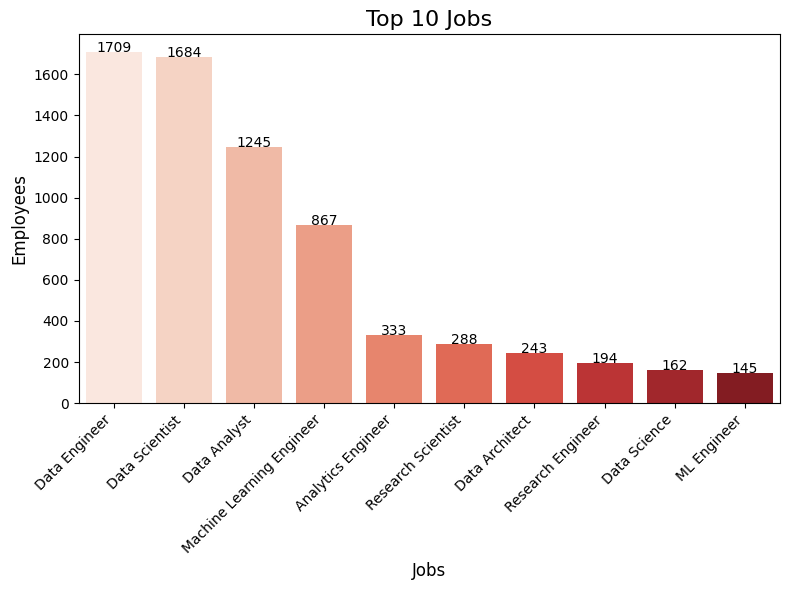

In [21]:
# Melihat 10 pekerjaan teratas
jumlah_karyawan = df.groupby('job_title').size().reset_index()
jumlah_karyawan.columns = ['Jobs', 'Employees']

top_10_jobs = jumlah_karyawan.sort_values(by='Employees', ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(data=top_10_jobs, x='Jobs', y='Employees', palette='Reds')

plt.title('Top 10 Jobs', fontsize=16)
plt.xlabel('Jobs', fontsize=12)
plt.ylabel('Employees', fontsize=12)
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_10_jobs['Employees']):
    plt.text(index, value + 1, f'{value}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


Berdasarkan visualisasi di atas, dapat dilihat bahwa Data Engineer merupakan pekerjaan dengan jumlah karyawan terbanyak, yaitu sebanyak 1,709 karyawan, diikuti oleh Data Scientist dengan jumlah 1,684 karyawan, dan Data Analyst dengan 1,245 karyawan

## Salaries by Experience Level

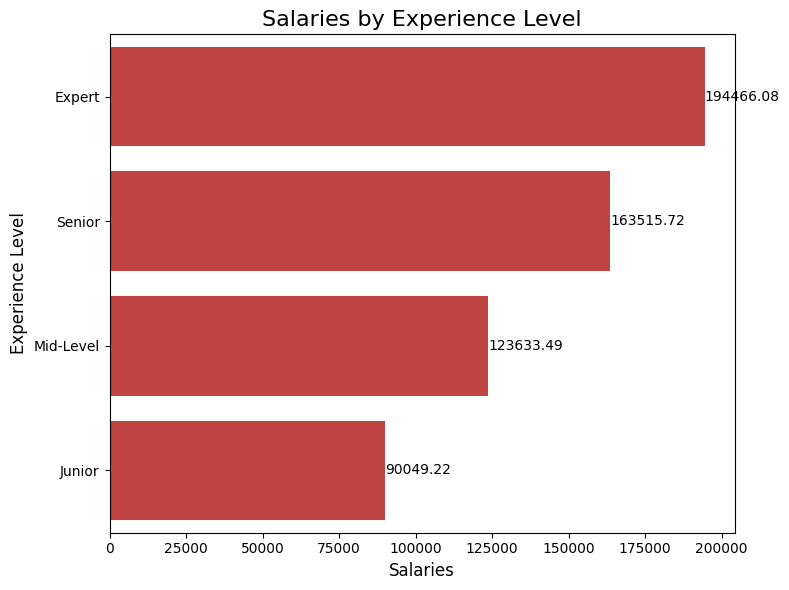

In [22]:
# Menghitung rata-rata gaji berdasarkan pengalaman
rata_gaji = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
rata_gaji = rata_gaji.sort_values(by='salary_in_usd', ascending=False)

# Membuat barplot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='salary_in_usd', y='experience_level', data=rata_gaji, color='#D32F2F')

# Menambahkan judul dan label
plt.title('Salaries by Experience Level', fontsize=16)
plt.xlabel('Salaries', fontsize=12)
plt.ylabel('Experience Level', fontsize=12)

# Menambahkan label nilai di bar
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan hasil analisis, karyawan dengan tingkat pengalaman Expert memiliki rata-rata gaji hampir 200,000 USD, yang merupakan gaji tertinggi. Di sisi lain, karyawan dengan tingkat pengalaman Junior mencatatkan rata-rata gaji terendah, yaitu sekitar 90,000 USD

## Distribution of Experience Levels in Companies by Size

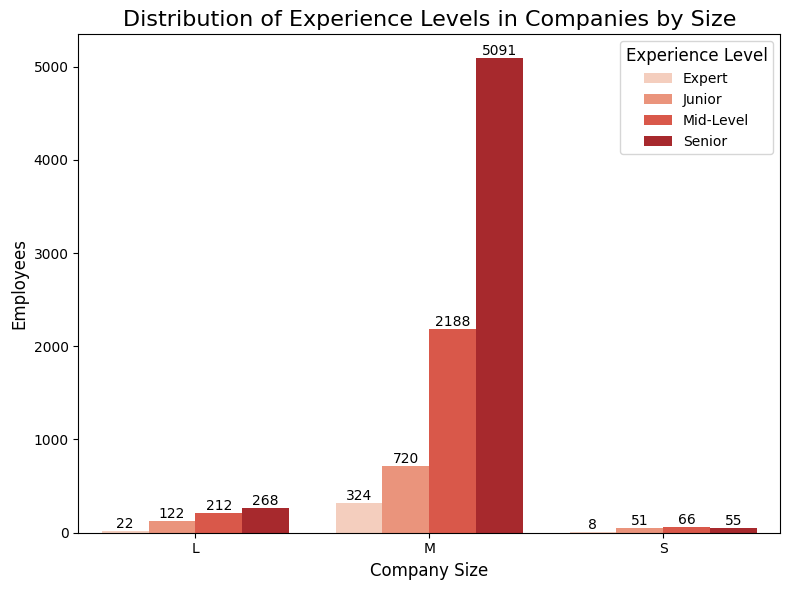

In [23]:
# Melihat hubungan ukuran perusahaan dan level pengalaman
job_count = df.groupby(['company_size', 'experience_level']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    data=job_count,
    x='company_size',
    y='count',
    hue='experience_level',
    palette='Reds'
)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Distribution of Experience Levels in Companies by Size', fontsize=16, color='black')
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Employees', fontsize=12)
plt.legend(title='Experience Level', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()

Berdasarkan analisis, ditemukan bahwa karyawan dengan tingkat pengalaman Senior banyak bekerja di perusahaan dengan ukuran M, sementara karyawan dengan tingkat pengalaman Junior lebih banyak ditemukan di perusahaan dengan ukuran L. Untuk tingkat pengalaman Mid Level, kebanyakan bekerja di perusahaan dengan ukuran M, dan karyawan dengan tingkat pengalaman Expert juga banyak terdapat di perusahaan berukuran M.

## Distribution of Job Categories by Employment Type

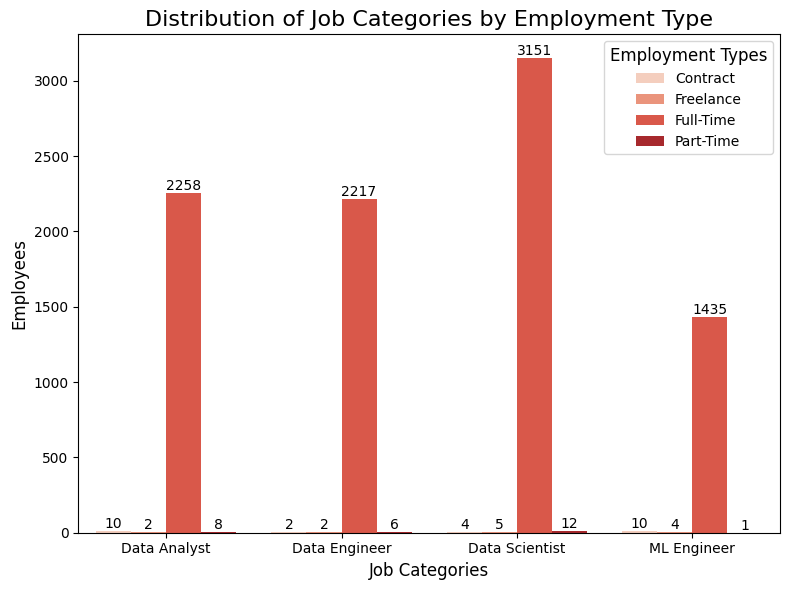

In [24]:
# Melihat hubungan jenis pekerjaan dan kategori pekerjaan
job_count = df.groupby(['job_category', 'employment_type']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    data=job_count,
    x='job_category',
    y='count',
    hue='employment_type',
    palette='Reds'
)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Distribution of Job Categories by Employment Type', fontsize=16, color='black')
plt.xlabel('Job Categories', fontsize=12)
plt.ylabel('Employees', fontsize=12)
plt.legend(title='Employment Types', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()


Berdasarkan analisis, ditemukan bahwa Data Scientist memiliki jumlah pekerja full-time terbanyak, yaitu sebanyak 3,151 karyawan, diikuti oleh Data Analyst dengan 2,258 karyawan, Data Engineer dengan 2,217 karyawan, dan ML Engineer dengan 1,435 karyawan

## Top 5 Remote Jobs

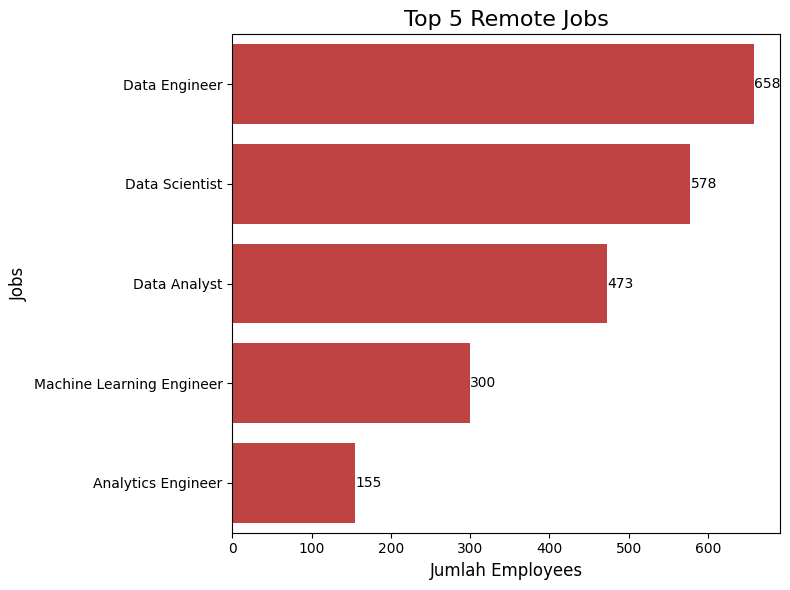

In [25]:
# Melihat 5 pekerjaan dengan remote jobs terbanyak
remote_jobs = df[df['remote_ratio'] == 100]
remote_jobs = remote_jobs['job_title'].value_counts().reset_index()
remote_jobs.columns = ['Jobs', 'Employees']

top_remote_locations = remote_jobs.head(5)

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Employees', y='Jobs', data=top_remote_locations, color='#D32F2F')

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Top 5 Remote Jobs', fontsize=16)
plt.xlabel('Jumlah Employees', fontsize=12)
plt.ylabel('Jobs', fontsize=12)

plt.tight_layout()
plt.show()


Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa Data Engineer merupakan pekerjaan dengan jumlah remote job terbanyak, diikuti oleh Data Scientist dan Data Analyst

## Thank You